# 1. 数据集

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split


np.random.seed(233)
x = np.random.uniform(-4, 2, size = (100))
y = x ** 2 + 4 * x + 3 + 1.5 * np.random.randn(100)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, random_state=233)
X_train = x_train.reshape(-1, 1)


In [3]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60,), (40,), (60,), (40,))

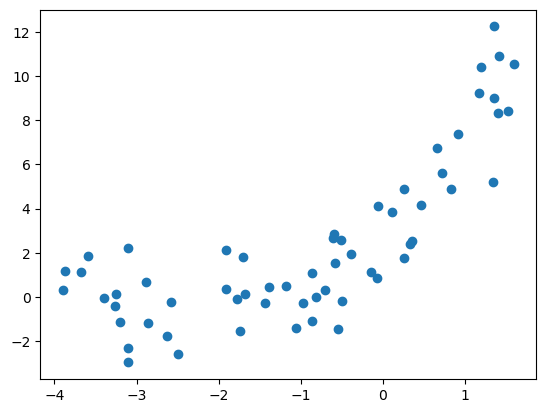

In [4]:
plt.scatter(x_train,y_train)
plt.show()

# 2. 欠拟合

In [5]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [6]:
y_predict = linear_regression.predict(X_train)

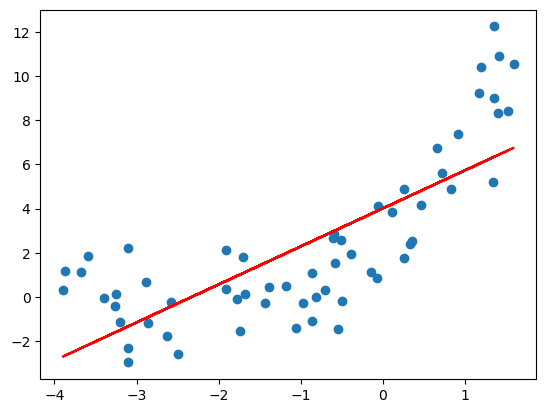

In [7]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_predict, color = 'red')
plt.show()

In [8]:
linear_regression.score(X_train, y_train)

0.5833375346497858

# 3. 过拟合

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
# 创建一个二次多项式特征生成器，degree=2 表示生成最高为2次幂的多项式特征
polynomial_features = PolynomialFeatures(degree=2)
# 使用多项式特征生成器对原始特征 X 进行变换，得到包含二次项的新特征矩阵 X_poly
# 例如，如果 X 只有一个特征，则 X_poly 会包含 [1, x, x^2] 三列
X_poly = polynomial_features.fit_transform(X_train)

In [11]:
linear_regression = LinearRegression()
linear_regression.fit(X_poly, y_train)

LinearRegression()

In [12]:
y_predict = linear_regression.predict(X_poly)

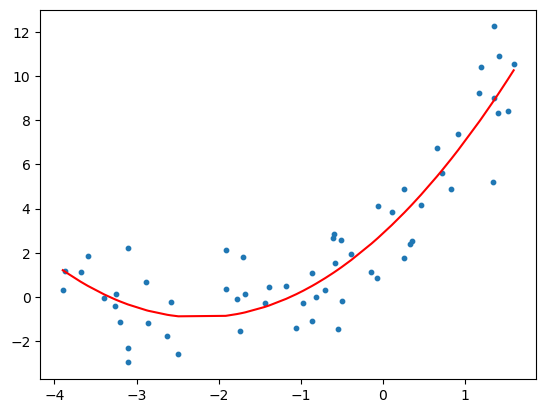

In [13]:
plt.scatter(x_train, y_train, s = 10)
plt.plot(np.sort(x_train), y_predict[np.argsort(x_train)], color = 'red')
plt.show()

In [14]:
X_new = np.linspace(-5, 3, 200).reshape(-1, 1)
X_new_poly = polynomial_features.fit_transform(X_new)
y_predict = linear_regression.predict(X_new_poly)

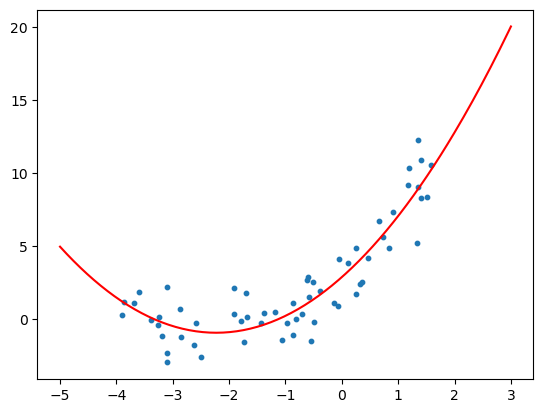

In [15]:
plt.scatter(x_train, y_train, s = 10)
plt.plot(X_new, y_predict, color = 'red')
plt.show()

In [16]:
print("Degree:", 2, "Score:", linear_regression.score(X_poly, y_train))

Degree: 2 Score: 0.8416732009283285


Degree:  2, Train data Score(R²): 0.842, Test data Score(R²):    0.871
Degree:  5, Train data Score(R²): 0.851, Test data Score(R²):    0.831
Degree:  8, Train data Score(R²): 0.860, Test data Score(R²):    0.416
Degree: 11, Train data Score(R²): 0.867, Test data Score(R²):   -4.869
Degree: 14, Train data Score(R²): 0.870, Test data Score(R²):  -86.257
Degree: 17, Train data Score(R²): 0.871, Test data Score(R²): -375.851


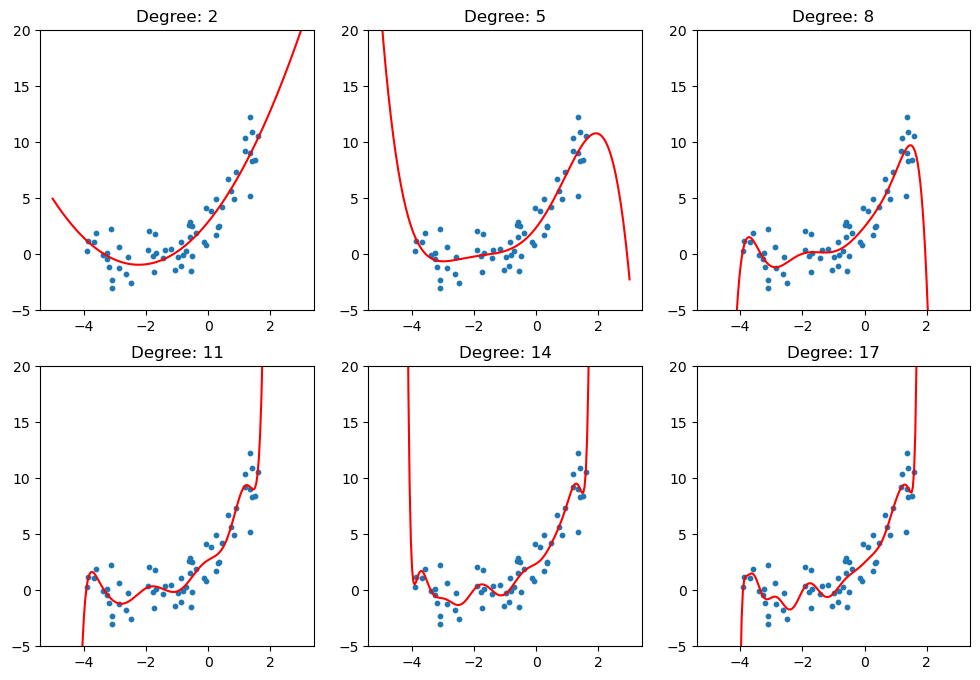

In [17]:
#  指定画布大小
plt.rcParams["figure.figsize"] = (12, 8)

degrees = [2, 5, 8, 11,14,17]
for i, degree in enumerate(degrees):
    polynomial_features = PolynomialFeatures(degree = degree)
    X_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.fit_transform(x_test.reshape(-1, 1))

    
    linear_regression = LinearRegression()
    linear_regression.fit(X_poly, y_train)
    
    X_new = np.linspace(-5, 3, 200).reshape(-1, 1)
    X_new_poly = polynomial_features.fit_transform(X_new)
    y_predict = linear_regression.predict(X_new_poly)
    
    plt.subplot(2, 3, i + 1)
    plt.title("Degree: {0}".format(degree))
    plt.scatter(x_train, y_train, s = 10)
    plt.ylim(-5, 20)
    plt.plot(X_new, y_predict, color = 'red')
    
    #   - R² = 1：模型完美拟合数据，预测值与真实值完全一致
    #   - R² = 0：模型预测效果等同于简单平均（即模型没有学到任何有用信息）。
    #   - R² < 0：模型预测效果甚至比简单平均还差（这种情况通常表示模型严重过拟合或数据存在问题)
    print("Degree: {:2d}, Train data Score(R²): {:4.3f}, Test data Score(R²): {:8.3f}".format(
        degree, linear_regression.score(X_poly, y_train), linear_regression.score(X_test_poly, y_test)))
    
plt.show()
# 可以看到过拟合时,在训练集上的分数很高,但是在测试集上的分数很低,这就是过拟合的表现
# 过拟合的解决方法
# 1. 选择更简单的模型
# 2. 收集更多的数据
# 3. 正则化
# 4. 交叉验证
# 5. 等等